### Note that the layers and masked images generated here 

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# this function displays the image which is in the form of data 2D array
def plot_img(data):
    plt.imshow(data, cmap='binary')  # 'gray' colormap for grayscale images
    plt.xticks([]) # remove x-ticks
    plt.yticks([]) # remove y-ticks
    plt.show()

# function to print all the 6 images in a row
def plot_imgs(data_matrix):
    fig, axes = plt.subplots(1, 6, figsize=(6, 1), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data_matrix[i], cmap='binary', interpolation='nearest')

Original Image:


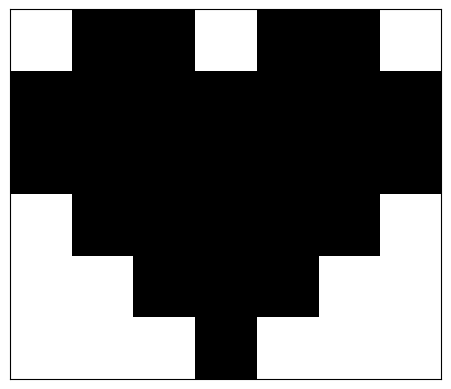

In [55]:
# image 2D array
img = np.array([[0,1,1,0,1,1,0],
                [1,1,1,1,1,1,1],
                [1,1,1,1,1,1,1],
                [0,1,1,1,1,1,0],
                [0,0,1,1,1,0,0],
                [0,0,0,1,0,0,0]])

print("Original Image:")
plot_img(img)
# finding U, S and V using the .svd method of linalg class of numpy
U, S, V = np.linalg.svd(img)
# converting all the numpy 2D arrays to 2D python lists
U = [row.tolist() for row in U] # converting each row to list
S = S.tolist()
V = [row.tolist() for row in V] # converting each row to list

Layers Generated: 


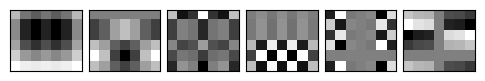

In [56]:
# All the layers in python can be generated by this code (taking outer product)
# array to store all the layers
array_of_layers = []
for layer in range(len(U[0])): # number of layers = number of columns of U
    img_layer = [] # each layer would be a 2D matrix
    colU = []
    rowV = V[layer] # note that the column of V is same as row of $V^{\top}$
    for row in range(len(U)):
        colU.append(U[row][layer])
    sigma = S[layer]
    for row in range(len(colU)):
        r = []
        for i in range(len(rowV)):
            r.append(colU[row] * rowV[i] * sigma)
        img_layer.append(r)
    array_of_layers.append(img_layer)

print("Layers Generated: ")
plot_imgs(array_of_layers)

Masked Images:


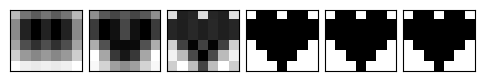

In [57]:
# The masked images can be generated by the following code
array_of_masked_images = []
for layer in array_of_layers:
    if len(array_of_masked_images) == 0:
        array_of_masked_images.append(layer)
        pass
    else:
        previous_img = array_of_masked_images[-1]
        curr_layer = layer
        # generates a zero array of the dimensions of the image
        new_image = [[0 for _ in range(len(previous_img[0]))] for _ in range(len(previous_img))]
        for i in range(len(curr_layer)):
            for j in range(len(curr_layer[0])):
                new_image[i][j] += previous_img[i][j] + curr_layer[i][j]
        array_of_masked_images.append(new_image)

print("Masked Images:")
plot_imgs(array_of_masked_images)